## Demographics - Tagged Colony Fate Tracking

- old version of summary plots (disease and bleaching) 
    - last updated 09/2024
<br>
<br>
- current disease demographics analysis is being done by Leah Harper
- current bleaching demographics analysis is in https://github.com/brookewicz/belize_bleaching 

In [3]:
library(tidyverse)
library(vegan)
library(phyloseq)
library(dplyr)
library(ggplot2)
library(stringr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: permute

Loading required package: lattice

This is vegan 2.6-5



## Disease tracking 2019 - 2024

In [4]:
# Graph of colonies that died/got diseased across the years
# x-axis year
# y-axis # of colonies
# stacked bar colors: healthy, diseased, dead

In [5]:
# 1st: create columns for each year 
# pull info from diseaseddate
# if healthy, write healthy in each column
# if date, write "diseased" in corresponding column, and "healthy" in previous years columns
# repeat for mortality 

In [6]:
getwd()

[1] "/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/Demographics"

In [7]:
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata')

In [8]:
colony_data <- read.csv('CBC_ColonyData.csv')

In [9]:
colony_data <- colony_data[, -1]

In [10]:
# extract year from Date_InitialTag and add it to new column
colony_data$Year_tagged <- format(as.Date(colony_data$Date_InitialTag, format="%m/%d/%y"), "%Y")

In [11]:
# drop X in col names 
colnames(colony_data)<-gsub("^X", "",colnames(colony_data) )

In [12]:
colnames(colony_data)

[1] "Date_InitialTag"          "Transect"                
 [3] "TransectNum"              "OldTagNum"               
 [5] "NewTagNum"                "Species"                 
 [7] "Meter"                    "Meters_90"               
 [9] "Direction"                "Size_Class"              
[11] "MaxDiameter"              "Height"                  
[13] "Date_DocumentedDisease"   "Date_DocumentedMortality"
[15] "Notes_062019"             "062019_Condition"        
[17] "062019_Percentage"        "Notes_052022"            
[19] "052022_Condition"         "052022_Percentage"       
[21] "Notes_122022"             "122022_Condition"        
[23] "122022_Percentage"        "Notes_092023"            
[25] "092023_Condition"         "092023_Percentage"       
[27] "Notes_112023"             "112023_Condition"        
[29] "112023_Percentage"        "Notes_122023"            
[31] "122023_Condition"         "122023_Percentage"       
[33] "Notes_012024"             "012024_Condition"        
[35] "012024_Percentage"        "Notes_022024"            
[37] "022024_Condition"         "022024_Percentage"       
[39] "Notes_042024"             "042024_Condition"        
[41] "042024_Percentage"        "062024_Condition"        
[43] "062024_Percentage"        "Notes_062024"            
[45] "082024_Condition"         "082024_Percentage"       
[47] "Notes_082024"             "immune_y.n"              
[49] "checked_colonies"         "Year_tagged"

In [13]:
head(colony_data)

,Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,042024_Percentage,062024_Condition,062024_Percentage,Notes_062024,082024_Condition,082024_Percentage,Notes_082024,immune_y.n,checked_colonies,Year_tagged
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,5,⋯,,Not_Visited,,,Not_Visited,,,n,x,2019
2,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,4,⋯,,Healthy,,95% mort,Healthy,,sample lower colony (original colony); inc old mort; too small for immune,y,x,2019
3,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,5,⋯,,Diseased,,"DC, sloughy, weird ssid disease",Healthy,,90% CLP; some discoloration,y,help (DC or disease throughout? Not clp or healthy?),2019
4,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,3,⋯,,Not_Visited,,,Not_Visited,,,n,x,2019
5,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,5,⋯,,Not_Visited,,,Not_Visited,,,n,x,2019
6,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,NA,⋯,,Not_Visited,,,Not_Visited,,,n,x,2019


In [14]:
# get subset of colonies tagged in 2019 (to be able to track since the beginning)
colonies_2019 <- subset(colony_data, colony_data$Year_tagged=="2019")
head(colonies_2019)

,Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,042024_Percentage,062024_Condition,062024_Percentage,Notes_062024,082024_Condition,082024_Percentage,Notes_082024,immune_y.n,checked_colonies,Year_tagged
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,5,⋯,,Not_Visited,,,Not_Visited,,,n,x,2019
2,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,4,⋯,,Healthy,,95% mort,Healthy,,sample lower colony (original colony); inc old mort; too small for immune,y,x,2019
3,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,5,⋯,,Diseased,,"DC, sloughy, weird ssid disease",Healthy,,90% CLP; some discoloration,y,help (DC or disease throughout? Not clp or healthy?),2019
4,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,3,⋯,,Not_Visited,,,Not_Visited,,,n,x,2019
5,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,5,⋯,,Not_Visited,,,Not_Visited,,,n,x,2019
6,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,NA,⋯,,Not_Visited,,,Not_Visited,,,n,x,2019


In [15]:
# drop NA in Date disease and mortality section
na<-is.na(colonies_2019$Date_DocumentedDisease)
na2 <- is.na(colonies_2019$Date_DocumentedMortality)
samples_to_delete <- na & na2
sum(samples_to_delete)

[1] 3

In [16]:
view_cols <- grep("Condition", colnames(colonies_2019), value = TRUE)

In [17]:
# first look at them to see why they have NAs
view_cols <- c(view_cols, c('NewTagNum','Species','Date_DocumentedDisease','Date_DocumentedMortality'))
colonies_2019[samples_to_delete,view_cols]
# looks like they were never found again after 2019, so removing FOR NOW

,062019_Condition,052022_Condition,122022_Condition,092023_Condition,112023_Condition,122023_Condition,012024_Condition,022024_Condition,042024_Condition,062024_Condition,082024_Condition,NewTagNum,Species,Date_DocumentedDisease,Date_DocumentedMortality
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
81,Healthy,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,347,PAST,NA,NA
108,Healthy,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,24,SSID,NA,NA
134,Healthy,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,12flag,PAST,NA,NA


In [18]:
# Remove rows where both Date_DocumentedDisease and Date_DocumentedMortality are NA
colonies_2019_delete <- colonies_2019 %>%
 filter(!(is.na(Date_DocumentedDisease) & is.na(Date_DocumentedMortality)))
#nrow(colonies_2019_delete)
#tail(colonies_2019_delete)

In [19]:
# find rows with entries in COLONIES_TO_LOOK_AT

#questionable_colonies <- colonies_2019_delete %>%
 # filter(!is.na(COLONIES_TO_LOOK_AT) & COLONIES_TO_LOOK_AT != "")
# Display 
#questionable_colonies
# all mmea with no data on mortality, so deleting for now 
## update: 7/5 - already fixed 

In [20]:
# delete questionable colonies
## dont run 
#colonies_2019 <- colonies_2019_delete %>%
 # filter(is.na(COLONIES_TO_LOOK_AT) | COLONIES_TO_LOOK_AT == "")
#remove column too
#colonies_2019$COLONIES_TO_LOOK_AT <- NULL

#look at condition columns
condition_columns <- colonies_2019 %>%
  select(matches("Condition"))

head(colonies_2019[, c(names(condition_columns), "Date_DocumentedDisease", "Date_DocumentedMortality")])


,062019_Condition,052022_Condition,122022_Condition,092023_Condition,112023_Condition,122023_Condition,012024_Condition,022024_Condition,042024_Condition,062024_Condition,082024_Condition,Date_DocumentedDisease,Date_DocumentedMortality
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Healthy,Diseased,Diseased,Diseased,Not_Visited,Not_Visited,Diseased,Not_Visited,Diseased,Not_Visited,Not_Visited,5/21/22,Diseased
2,Healthy,Healthy,Healthy,"CLP,CLB",CLB,CLB,"CLP,CLB",Healthy,Not_Visited,Healthy,Healthy,Healthy,Healthy
3,Healthy,Diseased,Healthy,Diseased,"CLP,CLB",Healthy,Healthy,DC,Diseased,Diseased,Healthy,5/21/22,Diseased
4,Healthy,Diseased,Dead,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,5/21/22,12/2/22
5,Healthy,Diseased,Diseased,Diseased,Not_Visited,Not_Visited,Diseased,Not_Visited,Diseased,Not_Visited,Not_Visited,5/21/22,Diseased
6,Healthy,Healthy,Diseased,Dead,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,12/2/22,9/25/23


## Graph for disease 2019 - 2022

In [21]:
head(colonies_2019)
colnames(colonies_2019)

,Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,042024_Percentage,062024_Condition,062024_Percentage,Notes_062024,082024_Condition,082024_Percentage,Notes_082024,immune_y.n,checked_colonies,Year_tagged
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,5,⋯,,Not_Visited,,,Not_Visited,,,n,x,2019
2,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,4,⋯,,Healthy,,95% mort,Healthy,,sample lower colony (original colony); inc old mort; too small for immune,y,x,2019
3,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,5,⋯,,Diseased,,"DC, sloughy, weird ssid disease",Healthy,,90% CLP; some discoloration,y,help (DC or disease throughout? Not clp or healthy?),2019
4,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,3,⋯,,Not_Visited,,,Not_Visited,,,n,x,2019
5,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,5,⋯,,Not_Visited,,,Not_Visited,,,n,x,2019
6,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,NA,⋯,,Not_Visited,,,Not_Visited,,,n,x,2019


[1] "Date_InitialTag"          "Transect"                
 [3] "TransectNum"              "OldTagNum"               
 [5] "NewTagNum"                "Species"                 
 [7] "Meter"                    "Meters_90"               
 [9] "Direction"                "Size_Class"              
[11] "MaxDiameter"              "Height"                  
[13] "Date_DocumentedDisease"   "Date_DocumentedMortality"
[15] "Notes_062019"             "062019_Condition"        
[17] "062019_Percentage"        "Notes_052022"            
[19] "052022_Condition"         "052022_Percentage"       
[21] "Notes_122022"             "122022_Condition"        
[23] "122022_Percentage"        "Notes_092023"            
[25] "092023_Condition"         "092023_Percentage"       
[27] "Notes_112023"             "112023_Condition"        
[29] "112023_Percentage"        "Notes_122023"            
[31] "122023_Condition"         "122023_Percentage"       
[33] "Notes_012024"             "012024_Condition"        
[35] "012024_Percentage"        "Notes_022024"            
[37] "022024_Condition"         "022024_Percentage"       
[39] "Notes_042024"             "042024_Condition"        
[41] "042024_Percentage"        "062024_Condition"        
[43] "062024_Percentage"        "Notes_062024"            
[45] "082024_Condition"         "082024_Percentage"       
[47] "Notes_082024"             "immune_y.n"              
[49] "checked_colonies"         "Year_tagged"

In [22]:
# select columns tracking disease 
disease_columns <- names(colonies_2019)[names(colonies_2019) %in% c('062019_Condition', '052022_Condition', '122022_Condition')]
disease_df<-colonies_2019[,disease_columns]
head(disease_df)

,062019_Condition,052022_Condition,122022_Condition
,<chr>,<chr>,<chr>
1,Healthy,Diseased,Diseased
2,Healthy,Healthy,Healthy
3,Healthy,Diseased,Healthy
4,Healthy,Diseased,Dead
5,Healthy,Diseased,Diseased
6,Healthy,Healthy,Diseased


In [23]:
convert_to_date <- function(col_name) {
  # Extract month and year from the column name
  month_year <- substr(col_name, 1, 6)
  month <- substr(month_year, 1, 2)
  year <- substr(month_year, 3, 6)
  
  # Define a vector of month abbreviations
  month_names <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
  
  # Get the month abbreviation using the month index
  month_name <- month_names[as.numeric(month)]
  
  # Construct and return the formatted date
  return(paste(month_name, year))
}

# Test the function with a sample column name
test_col_name <- "062019_Condition"
converted_date <- convert_to_date(test_col_name)
print(converted_date)  # Check the converted date


[1] "Jun 2019"


In [24]:
colnames(disease_df) <- sapply(colnames(disease_df), convert_to_date)
head(disease_df)

,Jun 2019,May 2022,Dec 2022
,<chr>,<chr>,<chr>
1,Healthy,Diseased,Diseased
2,Healthy,Healthy,Healthy
3,Healthy,Diseased,Healthy
4,Healthy,Diseased,Dead
5,Healthy,Diseased,Diseased
6,Healthy,Healthy,Diseased


In [25]:
#select datecondition columns 
# Find column names that contain "Condition"
condition_columns <- grep("Condition", names(colonies_2019), value = TRUE)
condition_columns

[1] "062019_Condition" "052022_Condition" "122022_Condition" "092023_Condition"
 [5] "112023_Condition" "122023_Condition" "012024_Condition" "022024_Condition"
 [9] "042024_Condition" "062024_Condition" "082024_Condition"

In [26]:
# create df with all conditions
condition_df<-colonies_2019[condition_columns]

In [27]:
# convert colnames (dates)
colnames(condition_df) <- sapply(colnames(condition_df), convert_to_date)
head(condition_df)

,Jun 2019,May 2022,Dec 2022,Sep 2023,Nov 2023,Dec 2023,Jan 2024,Feb 2024,Apr 2024,Jun 2024,Aug 2024
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Healthy,Diseased,Diseased,Diseased,Not_Visited,Not_Visited,Diseased,Not_Visited,Diseased,Not_Visited,Not_Visited
2,Healthy,Healthy,Healthy,"CLP,CLB",CLB,CLB,"CLP,CLB",Healthy,Not_Visited,Healthy,Healthy
3,Healthy,Diseased,Healthy,Diseased,"CLP,CLB",Healthy,Healthy,DC,Diseased,Diseased,Healthy
4,Healthy,Diseased,Dead,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited
5,Healthy,Diseased,Diseased,Diseased,Not_Visited,Not_Visited,Diseased,Not_Visited,Diseased,Not_Visited,Not_Visited
6,Healthy,Healthy,Diseased,Dead,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited,Not_Visited


In [28]:
# concatenate condition column with the rest of the columns I want to include in the df
disease_data <- cbind(disease_df, colonies_2019[,c("Date_InitialTag", "Transect", "Species", "MaxDiameter", "Height", "Year_tagged","NewTagNum")])
head(disease_data)

,Jun 2019,May 2022,Dec 2022,Date_InitialTag,Transect,Species,MaxDiameter,Height,Year_tagged,NewTagNum
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,Healthy,Diseased,Diseased,6/21/19,CBC30N,SSID,45,24,2019,1
2,Healthy,Healthy,Healthy,6/21/19,CBC30N,PAST,33,8,2019,2
3,Healthy,Diseased,Healthy,6/21/19,CBC30N,SSID,53,30,2019,3
4,Healthy,Diseased,Dead,10/15/19,CBC30N,PSTR,44,39,2019,4
5,Healthy,Diseased,Diseased,6/24/19,CBC30N,SSID,65,27,2019,5
6,Healthy,Healthy,Diseased,10/15/19,CBC30N,PSTR,35,38,2019,6


In [29]:
unique(disease_data$`May 2022`)

[1] "Diseased"    "Healthy"     "Dead"        "Not_Visited" "CLB,DC"

In [30]:
unique(disease_data$`Dec 2022`)

[1] "Diseased"    "Healthy"     "Dead"        "Not_Visited" "CLB,DC"     
[6] "CLB"

In [31]:
disease_data[disease_data$`May 2022`=="CLB,DC",]
disease_data[disease_data$`Dec 2022`=="CLB",]
# going to call healthy for the purpose of this plot (only looking at disease)

,Jun 2019,May 2022,Dec 2022,Date_InitialTag,Transect,Species,MaxDiameter,Height,Year_tagged,NewTagNum
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
65,Healthy,"CLB,DC","CLB,DC",6/25/19,SR30N,SSID,32,20,2019,72


,Jun 2019,May 2022,Dec 2022,Date_InitialTag,Transect,Species,MaxDiameter,Height,Year_tagged,NewTagNum
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
66,Healthy,Healthy,CLB,6/25/19,SR30N,SSID,35,21,2019,73


In [32]:
# change to healthy
disease_data[disease_data$`May 2022` == "CLB,DC", c("May 2022","Dec 2022")] <- "Healthy"
disease_data[disease_data$`Dec 2022`=="CLB",c("Dec 2022")]<- "Healthy"

In [33]:
disease_data[disease_data$`May 2022`=="Not_Visited",]
# remove these - looks like they were never found again 

,Jun 2019,May 2022,Dec 2022,Date_InitialTag,Transect,Species,MaxDiameter,Height,Year_tagged,NewTagNum
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
42,Healthy,Not_Visited,Not_Visited,6/25/19,SR30N,PAST,NA,NA,2019,47
81,Healthy,Not_Visited,Not_Visited,6/25/19,SR30N,PAST,NA,NA,2019,347
108,Healthy,Not_Visited,Not_Visited,6/23/19,LAGOON,SSID,NA,NA,2019,24
134,Healthy,Not_Visited,Not_Visited,6/23/19,LAGOON,PAST,NA,NA,2019,12flag
220,Healthy,Not_Visited,Not_Visited,6/21/19,SR30N,SSID,NA,NA,2019,341


In [34]:
# remove
disease_data <- disease_data %>%
    filter(`May 2022` != "Not_Visited")

In [35]:
disease_data[disease_data$`Dec 2022`=="Not_Visited",]
# changing all of these to dead 

,Jun 2019,May 2022,Dec 2022,Date_InitialTag,Transect,Species,MaxDiameter,Height,Year_tagged,NewTagNum
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
22,Healthy,Dead,Not_Visited,6/21/19,CBC30N,MCAV,29,19,2019,329
23,Healthy,Dead,Not_Visited,6/21/19,CBC30N,MCAV,20,19,2019,333
24,Healthy,Dead,Not_Visited,6/21/19,CBC30N,MMEA,14,6,2019,335
25,Healthy,Dead,Not_Visited,6/21/19,CBC30N,MCAV,28,25,2019,342
26,Healthy,Dead,Not_Visited,6/21/19,CBC30N,MCAV,35,12,2019,355
27,Healthy,Dead,Not_Visited,6/24/19,CBC30N,MMEA,19,18,2019,382
28,Healthy,Dead,Not_Visited,10/15/19,CBC30N,PSTR,35,33,2019,404
30,Healthy,Dead,Not_Visited,10/15/19,CBC30N,PSTR,56,44,2019,419
31,Healthy,Dead,Not_Visited,10/15/19,CBC30N,PSTR,48,30,2019,422


In [36]:
disease_data[disease_data$`Dec 2022`=="Not_Visited",c('Dec 2022')]<- "Dead"

In [37]:
# specify condition colors
condition_colors <- c("Healthy" = "darkgreen", "Diseased" = "coral1", "Dead" = "brown4","Not_Visited" = 'darkgrey',
                      'CLB'="aliceblue",'CLP'="khaki",'DC'='blueviolet','Diseased_Other'='chocolate4','TL'='darkgoldenrod3','NA'='gainsboro')


In [38]:
# Reshape the data for plotting
disease_df_long <- disease_df %>%
  mutate(year = rownames(disease_df)) %>%
  pivot_longer(-year, names_to = "month_year", values_to = "condition")

# Convert month_year to a factor with correct order of levels
disease_df_long <- disease_df_long %>%
  mutate(month_year = factor(month_year, levels = unique(month_year)))

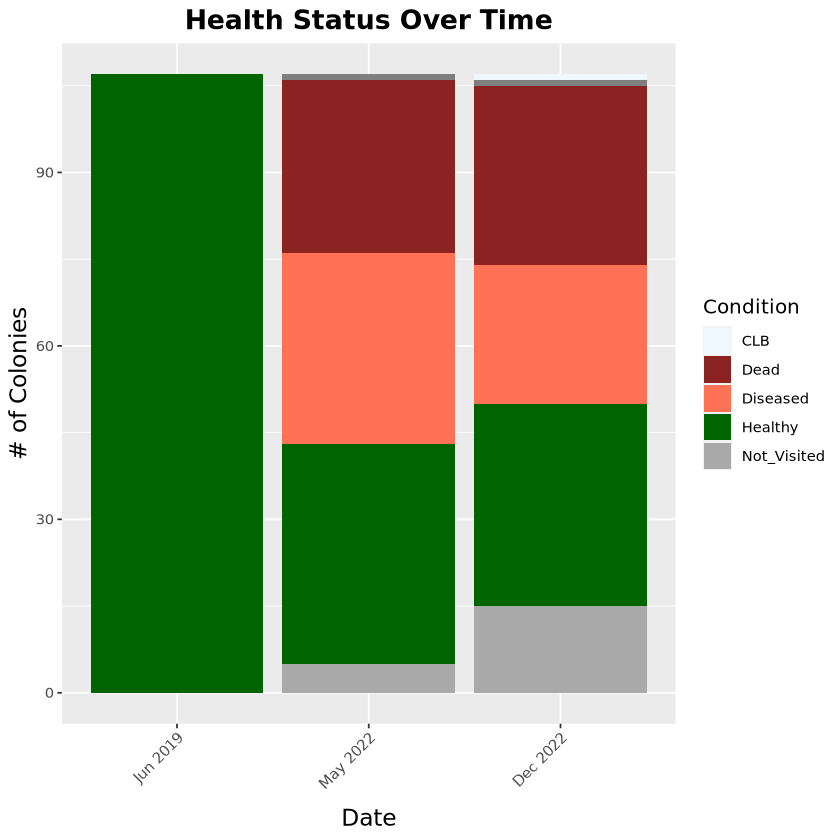

In [39]:
# Plot the data with stacked bars and custom colors
disease_plot<-ggplot(disease_df_long, aes(x = month_year, fill = condition)) +
  geom_bar(position = "stack", stat = "count") +  # Stacked bars
  scale_fill_manual(values = condition_colors) +  # Custom fill colors
  labs(x = "Date", y = "# of Colonies", title = "Health Status Over Time", fill = "Condition") + # Custom legend title
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels
        axis.title = element_text(size = 14),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 10)),
        legend.title = element_text(size = 12),  # Legend title settings
        plot.title = element_text(size = 16, hjust = 0.5, face = "bold")) 
disease_plot

In [40]:
getwd()

[1] "/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata"

In [41]:
pdf("disease_plot.pdf")
print(disease_plot)
dev.off()

png 
  2

### Species Disease Tracking

In [42]:
some_species <- subset(disease_data, Species != 'CNAT')

In [43]:
# Reshape the data for plotting
disease_data_long <- some_species %>%
  pivot_longer(cols = c("Jun 2019", "May 2022","Dec 2022"),
               names_to = "month_year",
               values_to = "condition")

# Convert month_year to a factor with correct order of levels
disease_data_long <- disease_data_long %>%
  mutate(month_year = factor(month_year, levels = unique(month_year)))

In [44]:
head(disease_data_long)

Date_InitialTag,Transect,Species,MaxDiameter,Height,Year_tagged,NewTagNum,month_year,condition
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<fct>,<chr>
6/21/19,CBC30N,SSID,45,24,2019,1,Jun 2019,Healthy
6/21/19,CBC30N,SSID,45,24,2019,1,May 2022,Diseased
6/21/19,CBC30N,SSID,45,24,2019,1,Dec 2022,Diseased
6/21/19,CBC30N,PAST,33,8,2019,2,Jun 2019,Healthy
6/21/19,CBC30N,PAST,33,8,2019,2,May 2022,Healthy
6/21/19,CBC30N,PAST,33,8,2019,2,Dec 2022,Healthy


In [50]:
test_colors <- c("Healthy" = "darkseagreen4", "Diseased" = "lightsalmon2", "Dead" = "tomato3")

In [51]:
w = 12
h = 14
options(repr.plot.width=w, repr.plot.height=h)

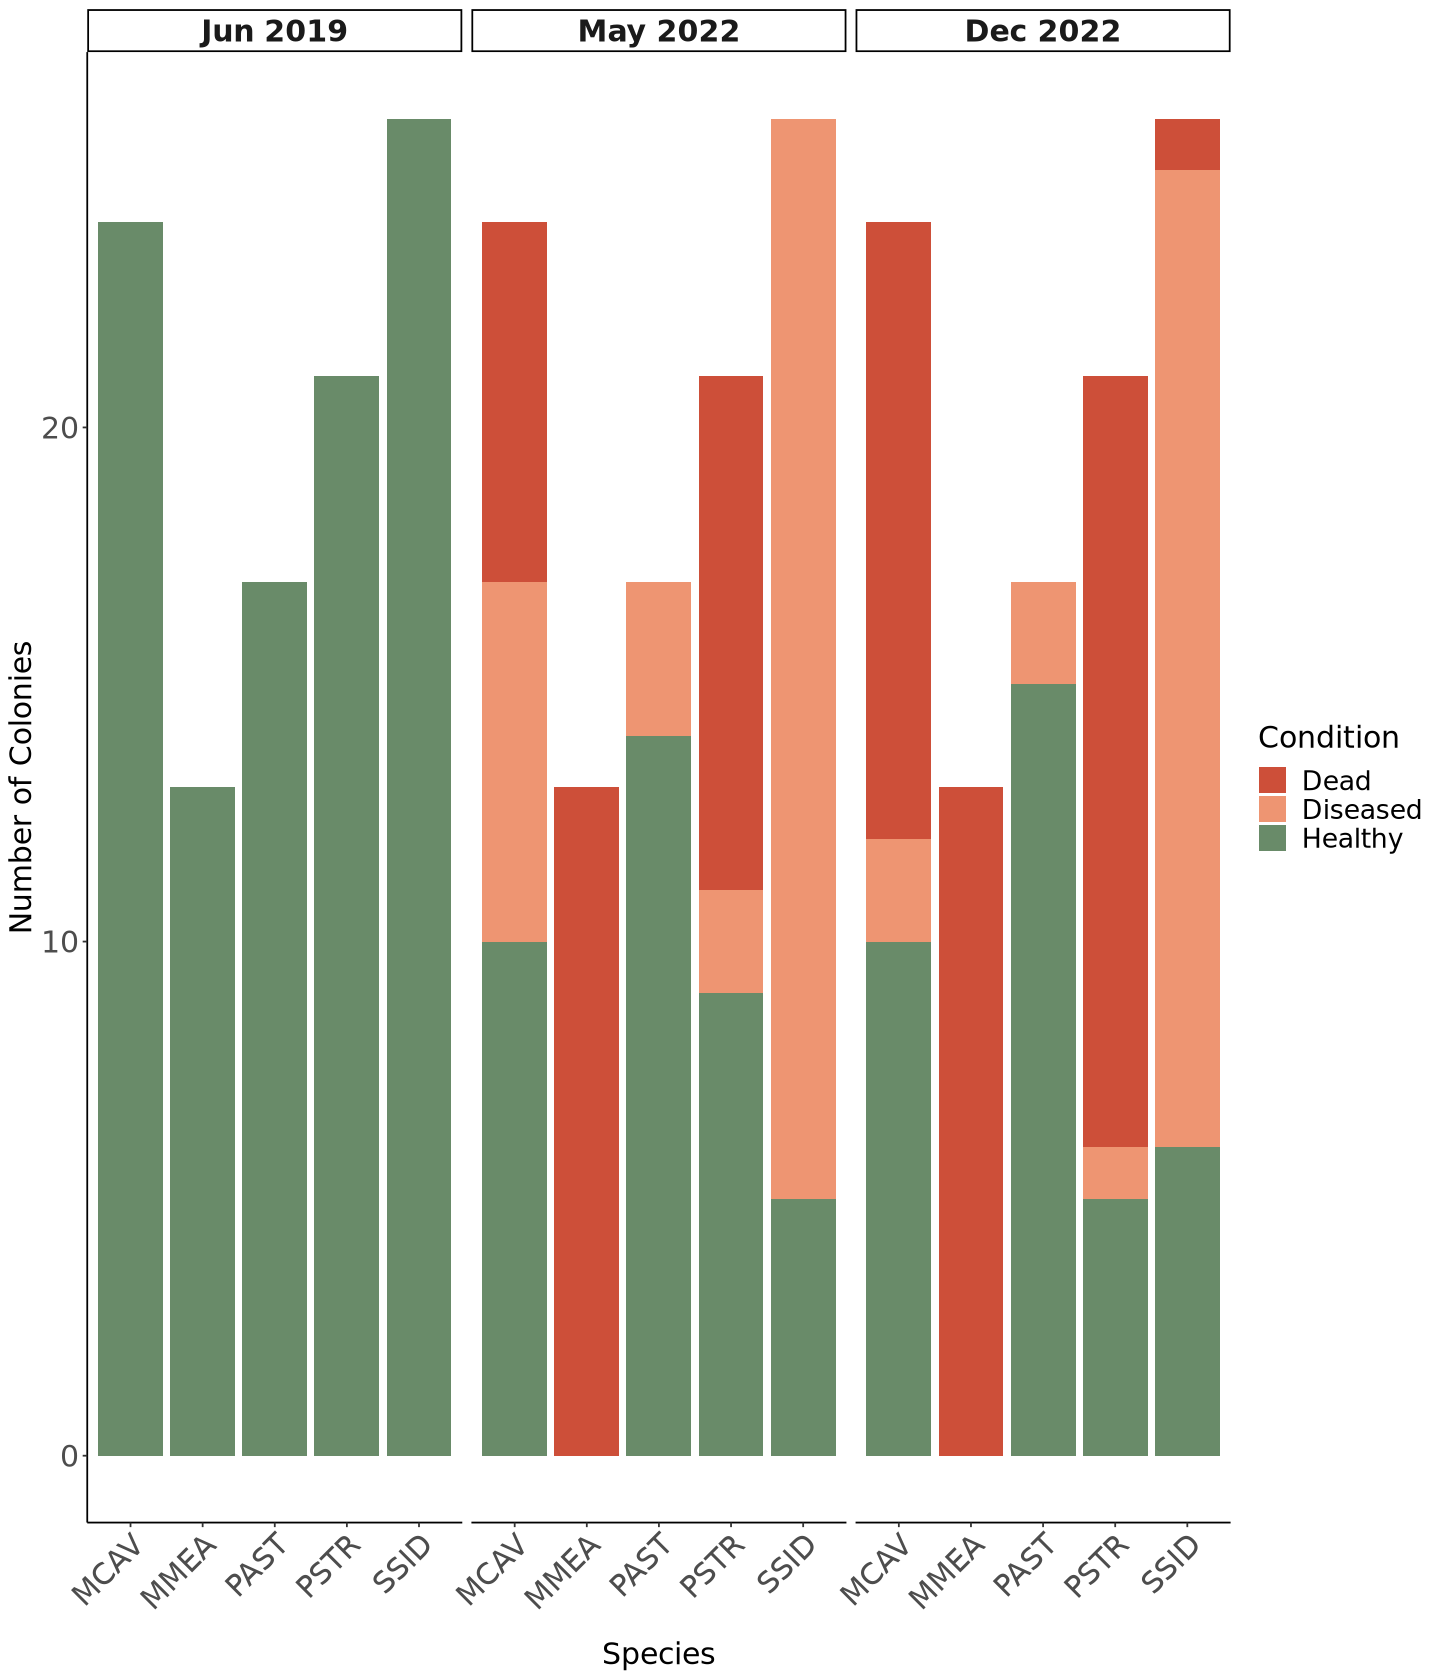

In [52]:
# Plot the data with stacked bars and custom colors
species_plot <- ggplot(disease_data_long, aes(x = Species, fill = condition)) +
  geom_bar(position = "stack", stat = "count") +  
  scale_fill_manual(values = test_colors) +  
  labs(x = "Species", y = "Number of Colonies", fill = "Condition") + 
  facet_wrap(~month_year, nrow = 1, scales = "free_x") +  
  theme_classic() +
  theme(axis.text.x = element_text(size = 18, angle = 45, hjust = 1),  # Larger X-axis tick labels
        axis.text.y = element_text(size = 18),  # Larger Y-axis tick labels
        strip.text = element_text(size = 18,face = "bold"),  # Larger facet titles
        axis.title = element_text(size = 18),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 16)),
        legend.title = element_text(size = 18),  # Larger legend title
        legend.text = element_text(size = 16),  # Larger legend contents
  )
species_plot

In [53]:
pdf("species_plot2.pdf", width = w, height = h) 
print(species_plot)
dev.off()

png 
  2

In [233]:
disease_dec2022_long<-disease_data_long[disease_data_long$month_year!="May 2022",]

In [115]:
options(repr.plot.width=20, repr.plot.height=20)

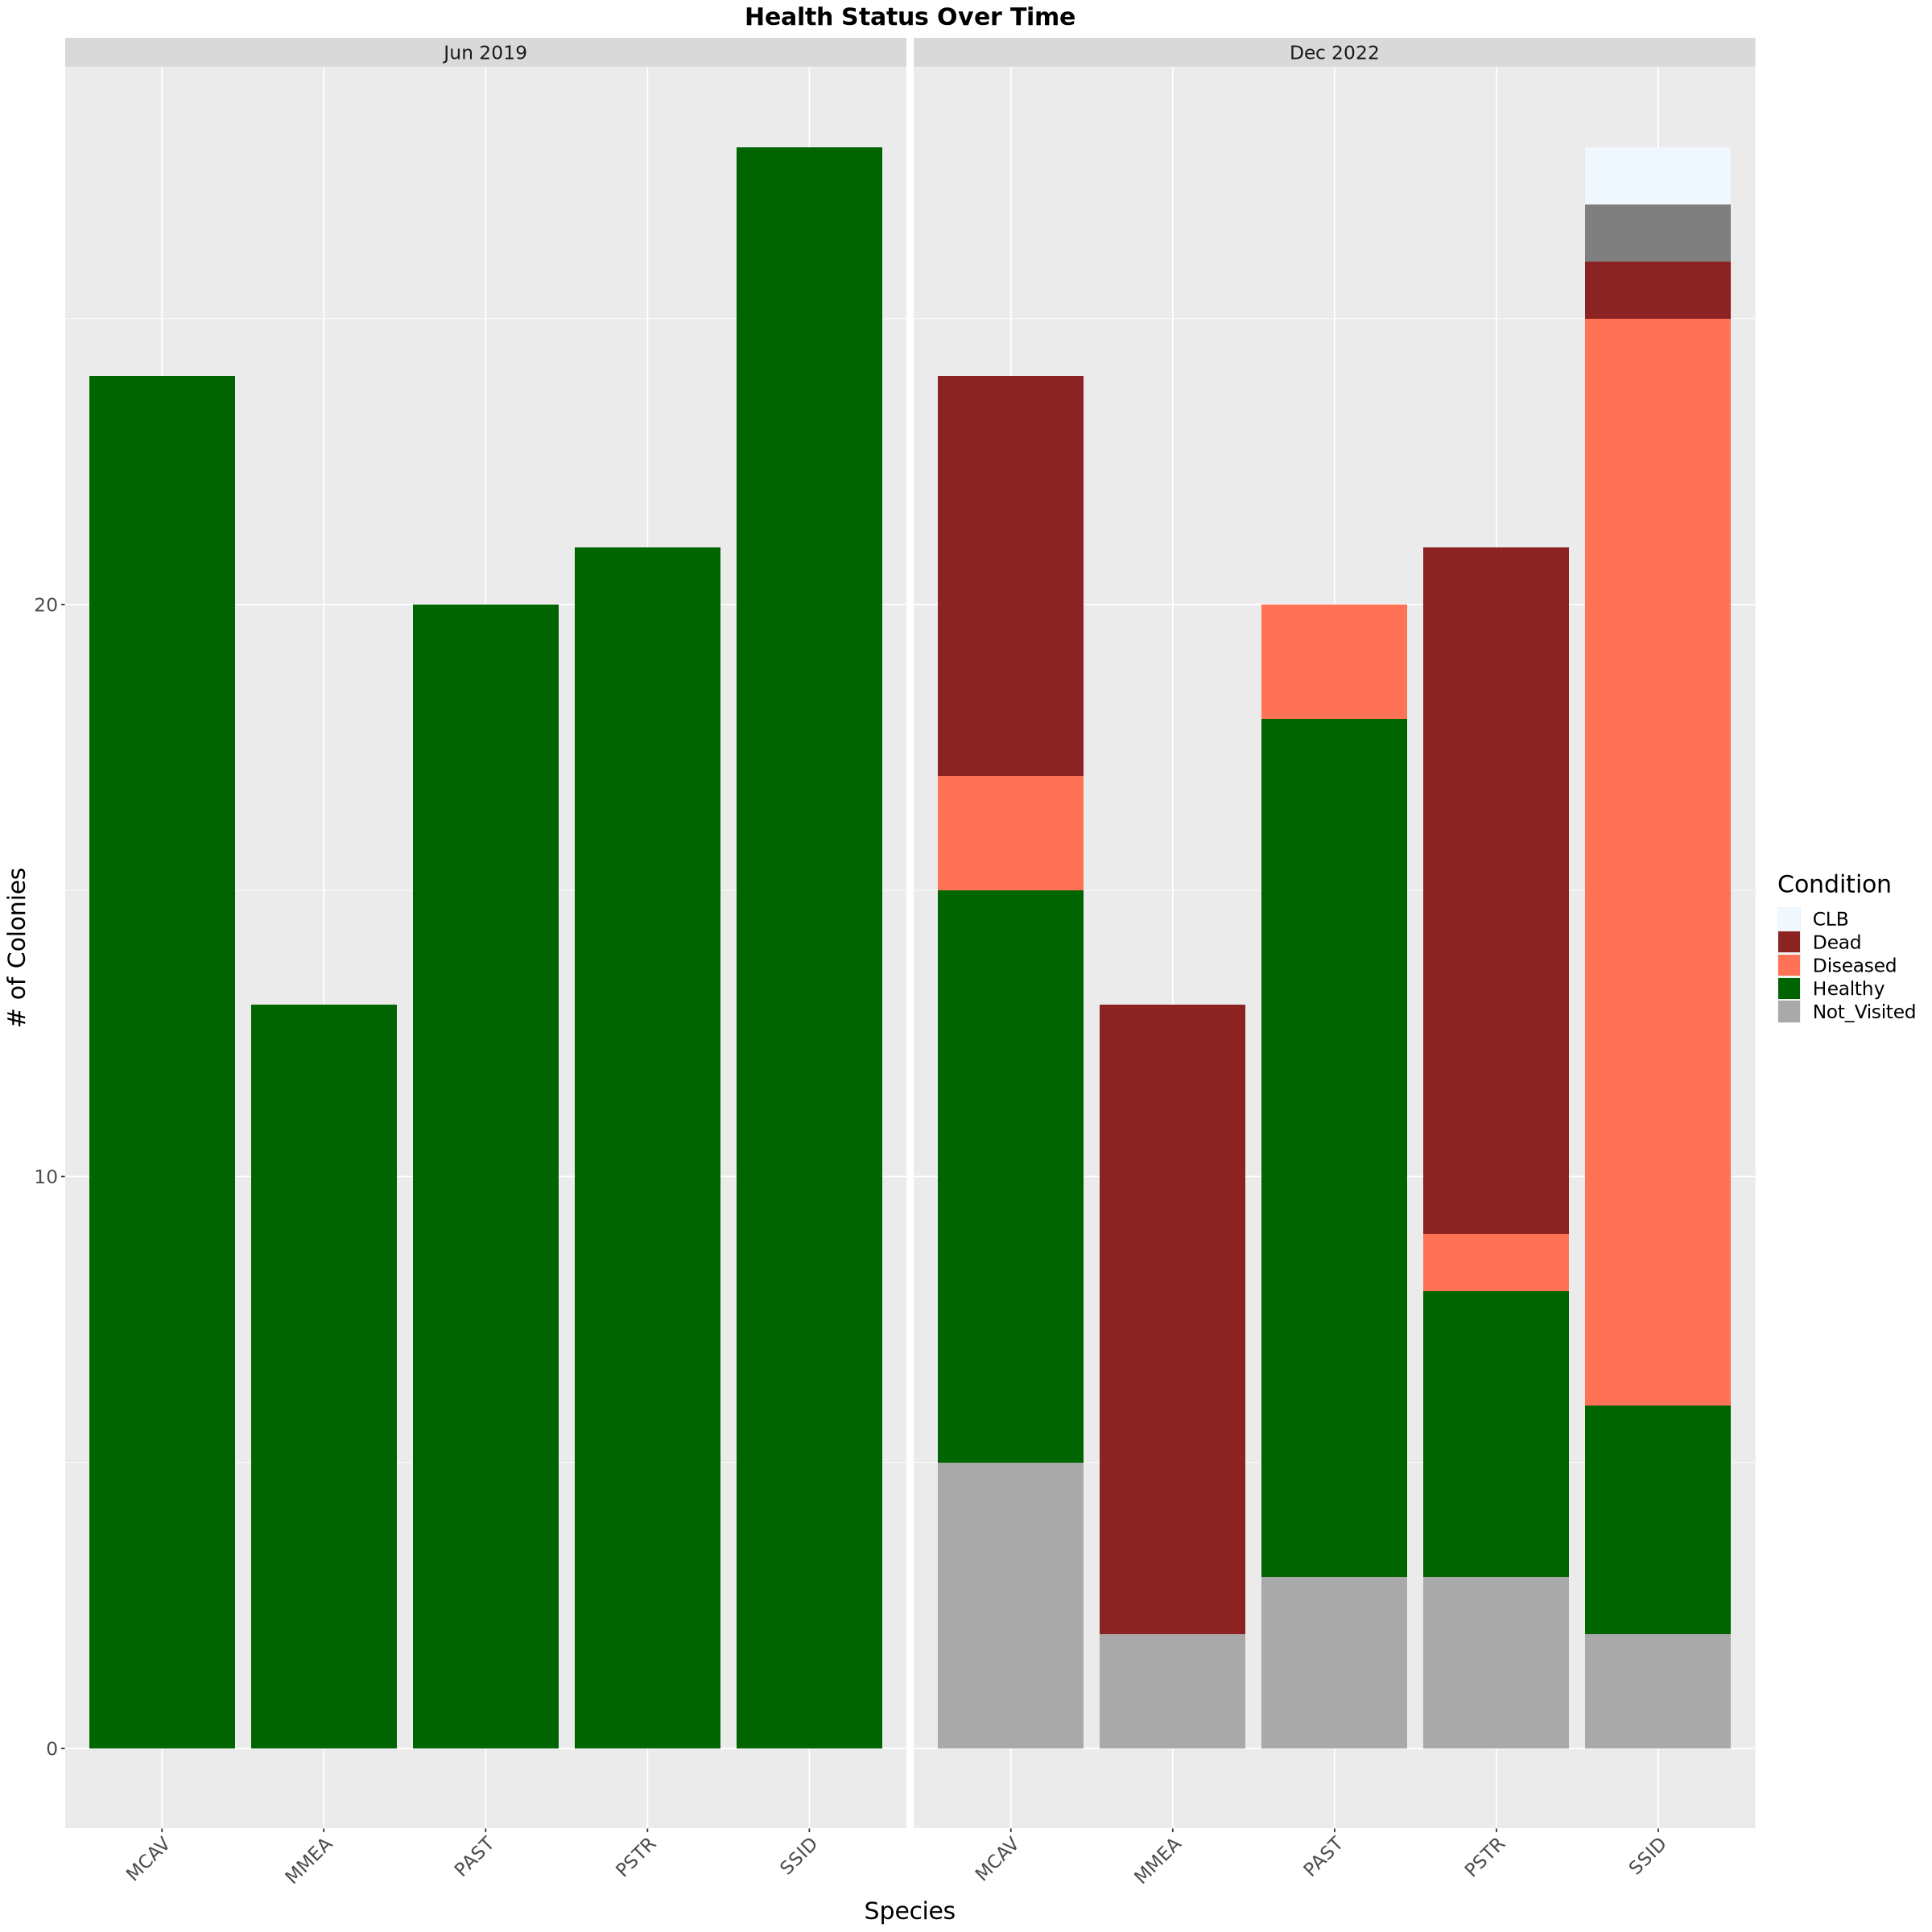

In [116]:
speciesdec_plot <- ggplot(disease_dec2022_long, aes(x = Species, fill = condition)) +
  geom_bar(position = "stack", stat = "count") +  # Side-by-side bars for each species
  scale_fill_manual(values = condition_colors) +  # Custom fill colors
  labs(x = "Species", y = "# of Colonies", title = "Health Status Over Time", fill = "Condition") + # Custom legend title
  facet_wrap(~month_year, nrow = 1, scales = "free_x") +  # Separate bars for each year
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),  # Rotate and increase x-axis labels
        axis.text.y = element_text(size = 14),  # Increase y-axis labels
        axis.title = element_text(size = 18),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 10)),
        legend.title = element_text(size = 18),  # Legend title font size
        legend.text = element_text(size = 14),  # Increase legend text size
        plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
        strip.text = element_text(size = 14))  # Increase facet title text size

speciesdec_plot

In [117]:
pdf("speciesdec_plot.pdf")
print(speciesdec_plot)
dev.off()

png 
  2

In [118]:
disease_may2022_long<-disease_data_long[disease_data_long$month_year!="Dec 2022",]

In [119]:
options(repr.plot.width=20, repr.plot.height=20)

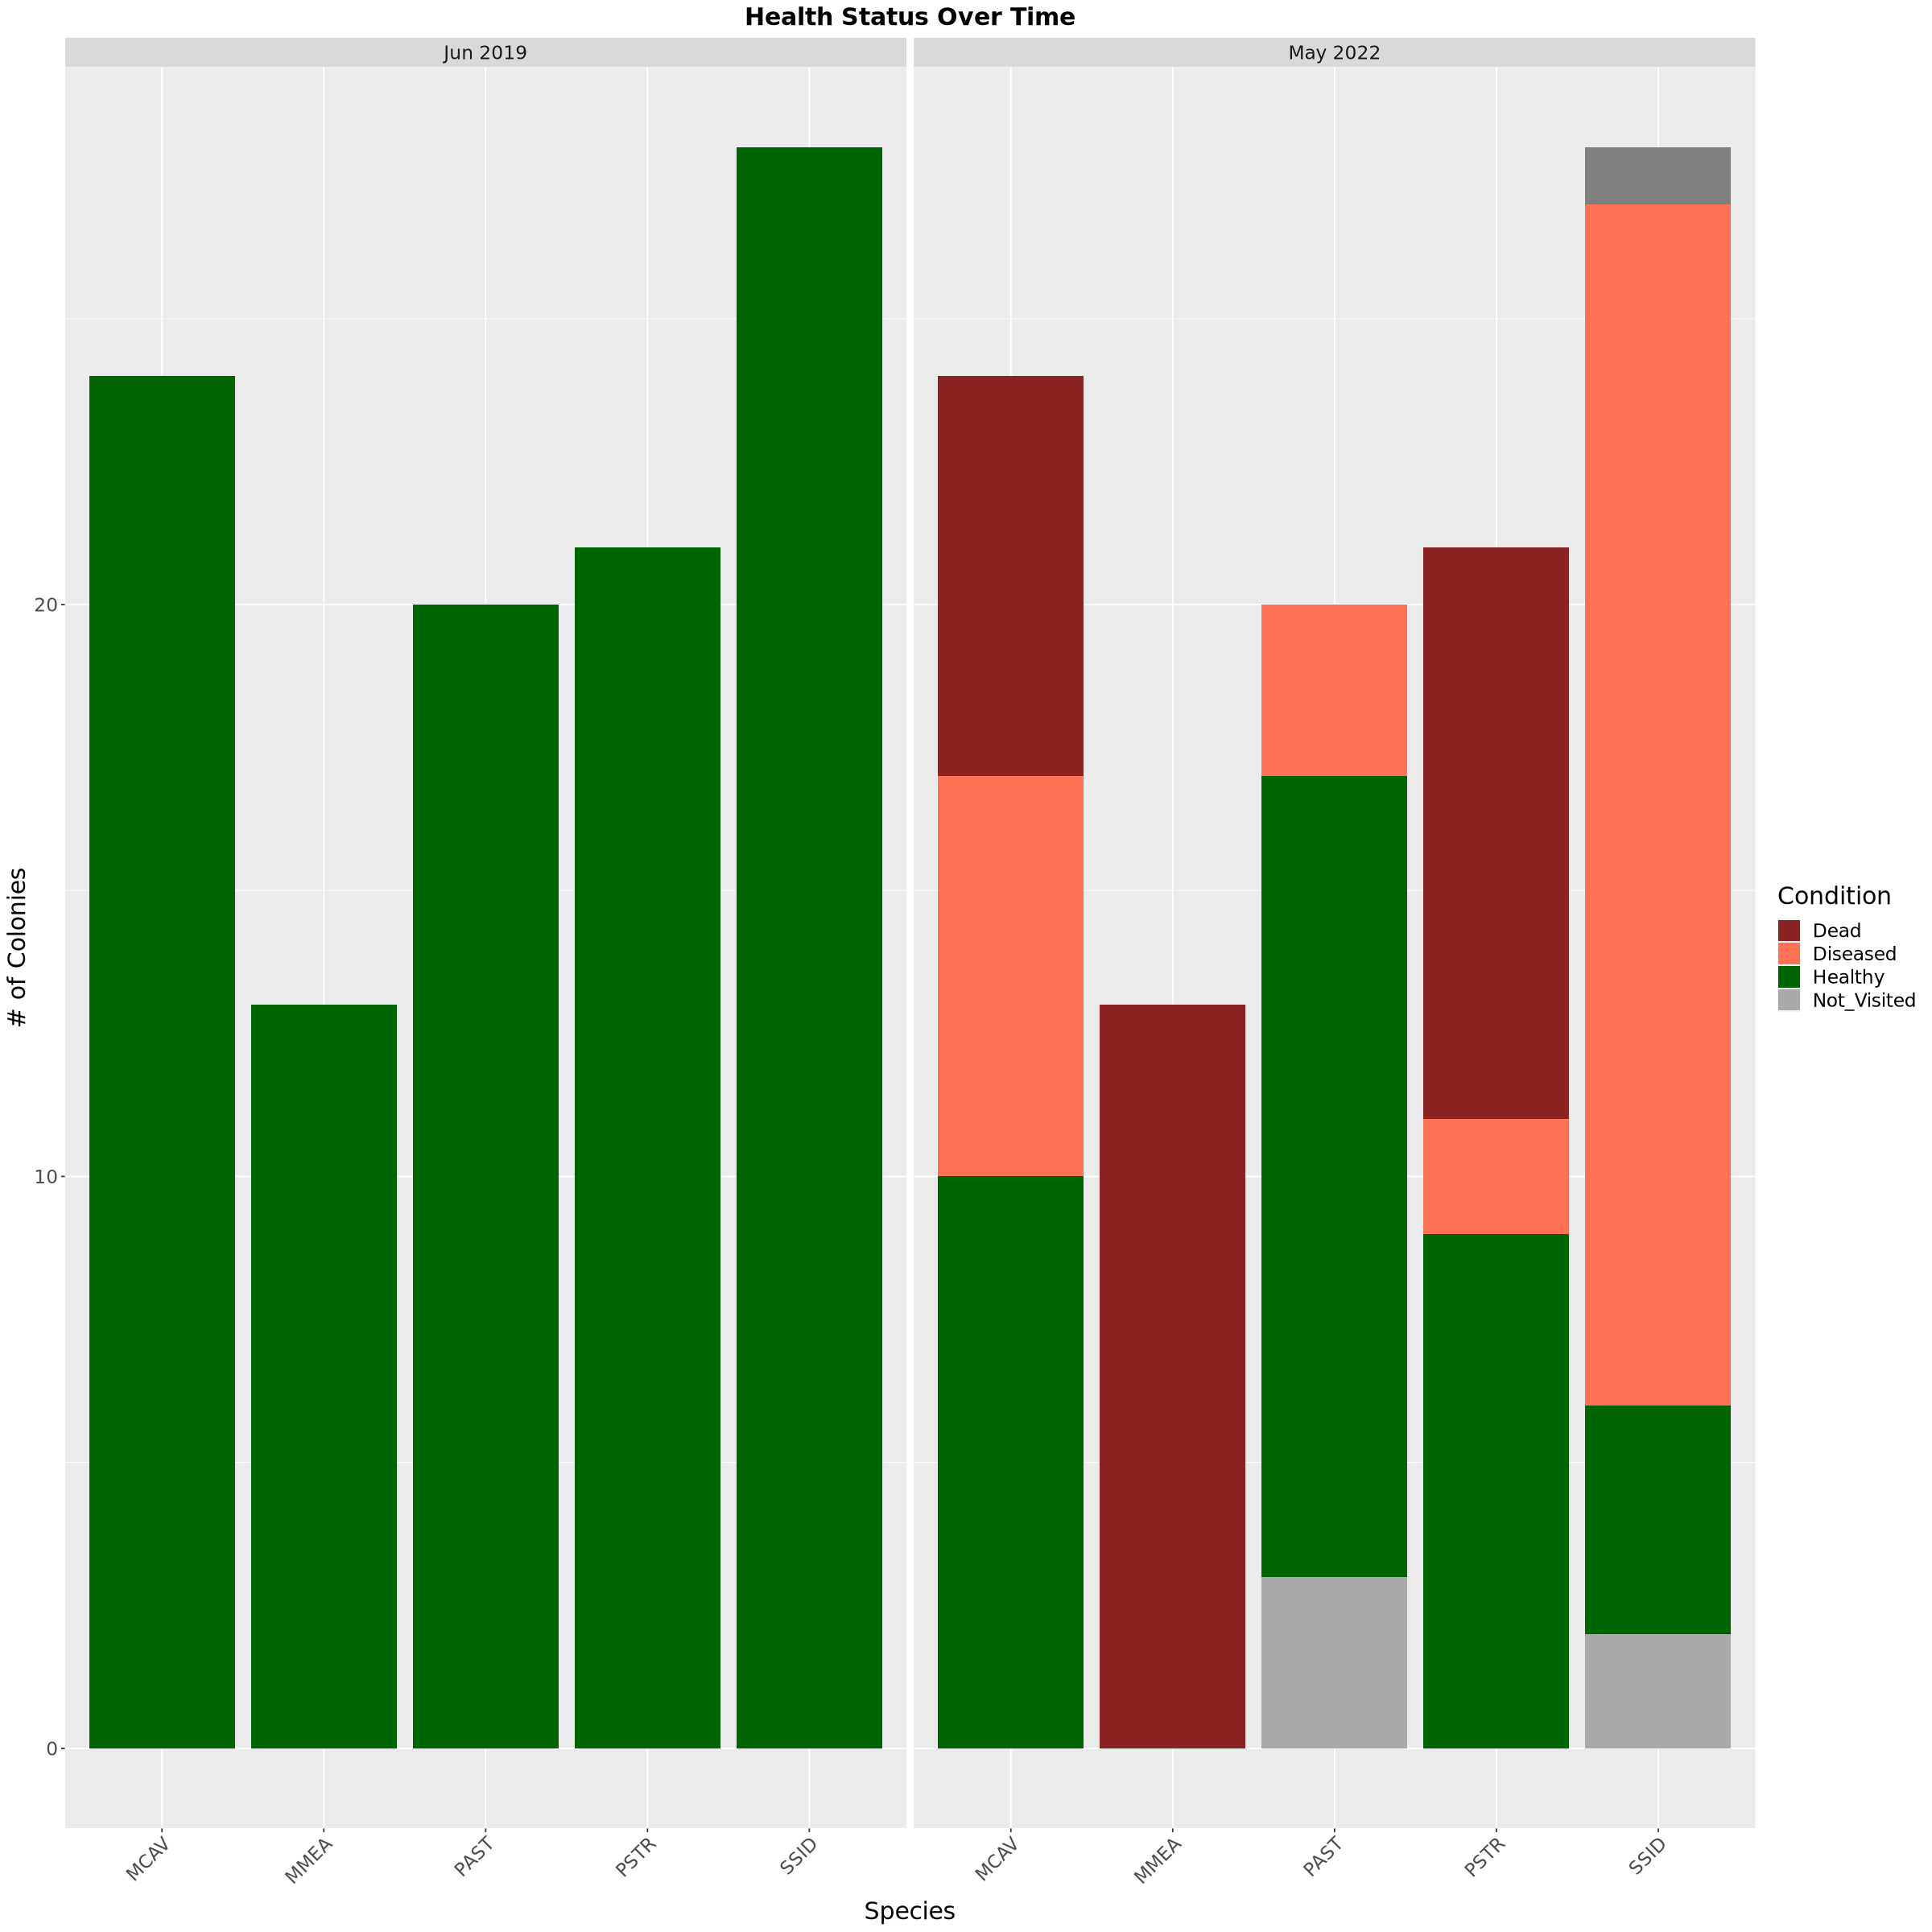

In [120]:
speciesmay_plot <- ggplot(disease_may2022_long, aes(x = Species, fill = condition)) +
  geom_bar(position = "stack", stat = "count") +  # Side-by-side bars for each species
  scale_fill_manual(values = condition_colors) +  # Custom fill colors
  labs(x = "Species", y = "# of Colonies", title = "Health Status Over Time", fill = "Condition") + # Custom legend title
  facet_wrap(~month_year, nrow = 1, scales = "free_x") +  # Separate bars for each year
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),  # Rotate and increase x-axis labels
        axis.text.y = element_text(size = 14),  # Increase y-axis labels
        axis.title = element_text(size = 18),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 10)),
        legend.title = element_text(size = 18),  # Legend title font size
        legend.text = element_text(size = 14),  # Increase legend text size
        plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
        strip.text = element_text(size = 14))  # Increase facet title text size

speciesmay_plot

In [121]:
pdf("speciesmay_plot.pdf")
print(speciesmay_plot)
dev.off()

png 
  2

In [122]:
# look at na's 
colony_data[(is.na(colony_data["Year_tagged"])),]
# none left 

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,042024_Percentage,062024_Condition,062024_Percentage,Notes_062024,082024_Condition,082024_Percentage,Notes_082024,immune_y.n,checked_colonies,Year_tagged
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>


In [123]:
colnames(colony_data)

[1] "Date_InitialTag"          "Transect"                
 [3] "TransectNum"              "OldTagNum"               
 [5] "NewTagNum"                "Species"                 
 [7] "Meter"                    "Meters_90"               
 [9] "Direction"                "Size_Class"              
[11] "MaxDiameter"              "Height"                  
[13] "Date_DocumentedDisease"   "Date_DocumentedMortality"
[15] "Notes_062019"             "062019_Condition"        
[17] "062019_Percentage"        "Notes_052022"            
[19] "052022_Condition"         "052022_Percentage"       
[21] "Notes_122022"             "122022_Condition"        
[23] "122022_Percentage"        "Notes_092023"            
[25] "092023_Condition"         "092023_Percentage"       
[27] "Notes_112023"             "112023_Condition"        
[29] "112023_Percentage"        "Notes_122023"            
[31] "122023_Condition"         "122023_Percentage"       
[33] "Notes_012024"             "012024_Condition"        
[35] "012024_Percentage"        "Notes_022024"            
[37] "022024_Condition"         "022024_Percentage"       
[39] "Notes_042024"             "042024_Condition"        
[41] "042024_Percentage"        "062024_Condition"        
[43] "062024_Percentage"        "Notes_062024"            
[45] "082024_Condition"         "082024_Percentage"       
[47] "Notes_082024"             "immune_y.n"              
[49] "checked_colonies"         "Year_tagged"

In [124]:
#remove colonies with 'na' in year_tagged
#colony_data <- drop_na(colony_data,"Year_tagged")
# remove colonies tagged in 2024 
colony_no2024 <- subset(colony_data, Year_tagged!=2024) 

In [125]:
#filter for disease in 2022
disease_2022_count <- colony_no2024 %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedDisease))

#filter for death in 2022
death_2022_count <- colony_no2024 %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedMortality)) 
percent_disease <- (nrow(disease_2022_count)/nrow(colony_no2024))*100
percent_mortality <- (nrow(death_2022_count)/nrow(colony_no2024))*100

cat("Percent of colonies that got diseased in 2022:", percent_disease,'%')
cat("
Percent of colonies that died in 2022:", percent_mortality,'%')
cat("
Total percentage of colonies affected by sctld:", percent_disease+percent_mortality,'%')

Percent of colonies that got diseased in 2022: 31.12583 %
Percent of colonies that died in 2022: 27.81457 %
Total percentage of colonies affected by sctld: 58.9404 %

In [126]:
#Goal: calculate % of mcav that got disease from 2019 to 2022

In [127]:
# sort for mcav only 
colony_mcav <- subset(colony_no2024, Species=="MCAV") 

In [128]:
#filter for disease in 2022
disease_mcav2022_count <- colony_mcav %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedDisease))

death_mcav2022_count <- colony_mcav %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedMortality)) 
mcav_dis<-(nrow(disease_mcav2022_count)/nrow(colony_mcav))*100
mcav_ded<- (nrow(death_mcav2022_count)/nrow(colony_mcav))*100

cat("Percent of mcav colonies that got diseased in 2022:",mcav_dis ,'%')
cat("
Percent of mcav colonies that died in 2022:",mcav_ded, '%')
cat("
Total percentage of mcav colonies affected by sctld:", mcav_dis+mcav_ded,'%')

Percent of mcav colonies that got diseased in 2022: 32.25806 %
Percent of mcav colonies that died in 2022: 38.70968 %
Total percentage of mcav colonies affected by sctld: 70.96774 %

In [129]:
# sort for past only 
colony_past <- subset(colony_no2024, Species=="PAST") 

In [130]:
# sort for PSTR only 
colony_pstr <- subset(colony_no2024, Species=="PSTR") 
#filter for disease in 2022
disease_pstr2022_count <- colony_pstr %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedDisease))

death_pstr2022_count <- colony_pstr %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedMortality)) 
pstr_dis<- (nrow(disease_pstr2022_count)/nrow(colony_pstr))*100
pstr_ded<- (nrow(death_pstr2022_count)/nrow(colony_pstr))*100

cat("Percent of pstr colonies that got diseased in 2022:",pstr_dis ,'%')
cat("
Percent of pstr colonies that died in 2022:", pstr_ded,'%')
cat("
Total percentage of pstr colonies affected by sctld:", pstr_dis+pstr_ded,'%')

Percent of pstr colonies that got diseased in 2022: 19.35484 %
Percent of pstr colonies that died in 2022: 48.3871 %
Total percentage of pstr colonies affected by sctld: 67.74194 %

In [131]:
#filter for disease in 2022
disease_past2022_count <- colony_past %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedDisease))

death_past2022_count <- colony_past %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedMortality)) 

cat("Percent of past colonies that got diseased in 2022:", (nrow(disease_past2022_count)/nrow(colony_past))*100,'%')
cat("
Percent of past colonies that died in 2022:", (nrow(death_past2022_count)/nrow(colony_past))*100,'%')
#nrow(colony_mcav)

Percent of past colonies that got diseased in 2022: 20 %
Percent of past colonies that died in 2022: 5 %

## Graph for conditions 2019 - 2024

In [93]:
# plot colonies (tagged in 2019) health statuses through 2024 
# Reshape colonies_2019
colonies_2019_long <- condition_df %>%
  mutate(row = rownames(condition_df)) %>%
  pivot_longer(-row, names_to = "month_year", values_to = "condition")

In [94]:
colonies_2019_long <- condition_df %>%
  rownames_to_column(var = "rowname") %>%  # Add row names as a column
  pivot_longer(-rowname, names_to = "month_year", values_to = "condition")

In [95]:
# Separate multiple conditions into individual rows
colonies_parsed <- colonies_2019_long %>%
  separate_rows(condition, sep = ",\\s*") 

In [96]:
head(colonies_parsed)

rowname,month_year,condition
<chr>,<chr>,<chr>
1,Jun 2019,Healthy
1,May 2022,Diseased
1,Dec 2022,Diseased
1,Sep 2023,Diseased
1,Nov 2023,Not_Visited
1,Dec 2023,Not_Visited


In [97]:
# order based on date
colonies_parsed <- colonies_parsed %>%
  mutate(date = parse_date(paste("01", month_year), format = "%d %b %Y"))
# Order the data frame by the date column
colonies_ordered <- colonies_parsed %>%
  arrange(date) %>%
  select(-date)  # Remove the temporary date column if no longer needed
# Check the result
print(colonies_ordered)
#specify order for ggplot
colonies_ordered <- colonies_ordered %>%
  mutate(month_year = factor(month_year, levels = unique(colonies_ordered$month_year)))


# A tibble: 1,198 × 3
   rowname month_year condition
   <chr>   <chr>      <chr>    
 1 1       Jun 2019   Healthy  
 2 2       Jun 2019   Healthy  
 3 3       Jun 2019   Healthy  
 4 4       Jun 2019   Healthy  
 5 5       Jun 2019   Healthy  
 6 6       Jun 2019   Healthy  
 7 7       Jun 2019   Healthy  
 8 8       Jun 2019   Healthy  
 9 9       Jun 2019   Healthy  
10 10      Jun 2019   Healthy  
# ℹ 1,188 more rows


In [98]:
unique(colonies_2019_long$condition)

[1] "Healthy"             "Diseased"            "Not_Visited"        
 [4] "CLP,CLB"             "CLB"                 "DC"                 
 [7] "Dead"                "CLP"                 "Diseased, CLB"      
[10] "Diseased, CLP"       "CLP, DC"             "Diseased_Other"     
[13] "CLB,DC"              "Diseased_Other, CLP" "CLP,DC"

In [99]:
options(repr.plot.width=20, repr.plot.height=10)

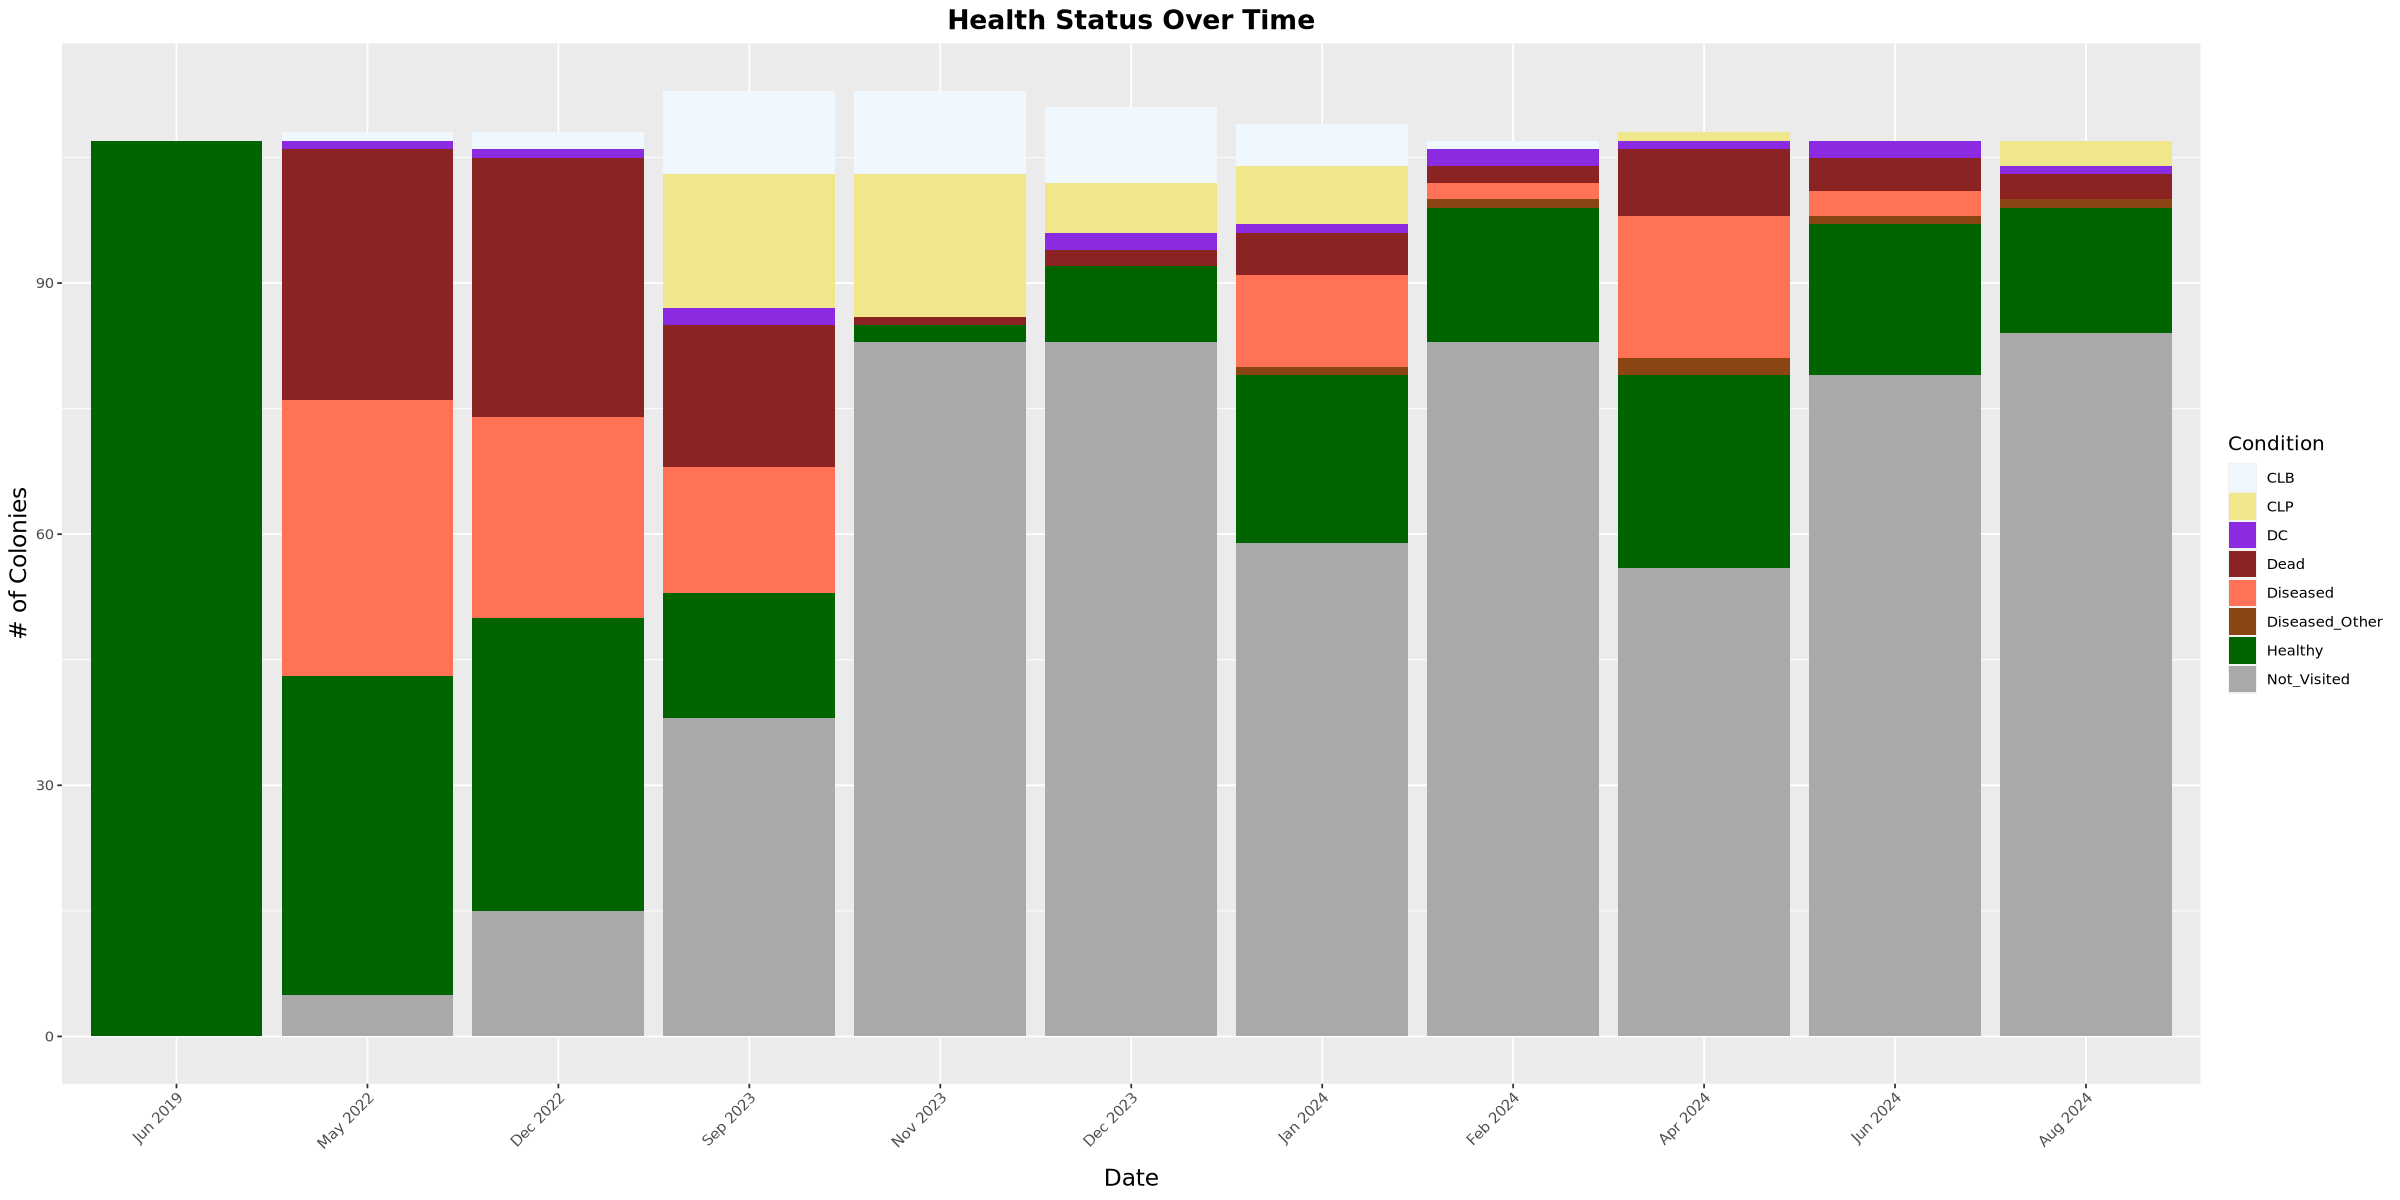

In [100]:
# Plot conditions over the years (only incl colonies tagged in 2019)
conditions_plot<-ggplot(colonies_ordered, aes(x = month_year, fill = condition)) +
  geom_bar(position = "stack", stat = "count") +  # Stacked bars
  scale_fill_manual(values = condition_colors,na.value = 'black') +  # Custom fill colors
  labs(x = "Date", y = "# of Colonies", title = "Health Status Over Time", fill = "Condition") + # Custom legend title
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels
        axis.title = element_text(size = 14),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 10)),
        legend.title = element_text(size = 12),  # Legend title settings
        plot.title = element_text(size = 16, hjust = 0.5, face = "bold")) 
conditions_plot
# of colonies isn't consistent because some colonies have multiple conditions at a time..
# clearly need to go back through everything and incorporate not visited 
# but then need to make it so that not visited is replaced by last standing condition just for plotting?

## Bleaching tracking 2023 - 2024

In [101]:
# plot percentages of colonies visited that are clb or clp 
# exclude not visited 
#visited_ordered<- colonies_ordered %>%
 #   filter(condition!="Not_Visited")
#unique(visited_ordered$condition)

# just filter for immune corals
immune_colony <- colony_data[colony_data$immune_y.n == "y", ]
immune_conditions<-immune_colony[condition_columns]

In [102]:
colnames(immune_conditions) <- sapply(colnames(immune_conditions), convert_to_date)

In [103]:
head(immune_conditions)

,Jun 2019,May 2022,Dec 2022,Sep 2023,Nov 2023,Dec 2023,Jan 2024,Feb 2024,Apr 2024,Jun 2024,Aug 2024
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,Healthy,Healthy,Healthy,"CLP,CLB",CLB,CLB,"CLP,CLB",Healthy,Not_Visited,Healthy,Healthy
3,Healthy,Diseased,Healthy,Diseased,"CLP,CLB",Healthy,Healthy,DC,Diseased,Diseased,Healthy
12,Healthy,Healthy,Healthy,Healthy,CLP,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy
13,Healthy,Healthy,Healthy,Healthy,CLP,Dead,Dead,Dead,Dead,Dead,Dead
20,Healthy,Healthy,Healthy,CLP,CLP,"CLP, DC",CLP,Healthy,Healthy,Healthy,Dead
23,Healthy,Healthy,Healthy,CLP,CLP,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy


In [104]:
# Reshape the data for plotting
immune_long <- immune_conditions %>%
  mutate(year = rownames(immune_conditions)) %>%
  pivot_longer(-year, names_to = "month_year", values_to = "condition")

In [105]:
# Separate multiple conditions into individual rows
immune_long <- immune_long %>%
  separate_rows(condition, sep = ",\\s*") 

In [106]:
# order based on date
immune_parsed <- immune_long %>%
  mutate(date = parse_date(paste("01", month_year), format = "%d %b %Y"))
# Order the data frame by the date column
immune_ordered <- immune_parsed %>%
  arrange(date) %>%
  select(-date)  # Remove the temporary date column if no longer needed
# exclude 2019-2022 
immune_ordered <- immune_ordered %>%
  filter(month_year != "Jun 2019" & month_year != "May 2022" & month_year != "Dec 2022")

#specify order for ggplot
immune_ordered <- immune_ordered %>%
  mutate(month_year = factor(month_year, levels = unique(colonies_ordered$month_year)))


In [107]:
unique(immune_ordered$condition)

[1] "CLP"            "CLB"            "Diseased"       "Healthy"       
[5] "DC"             "Dead"           "Diseased_Other" "Not_Visited"

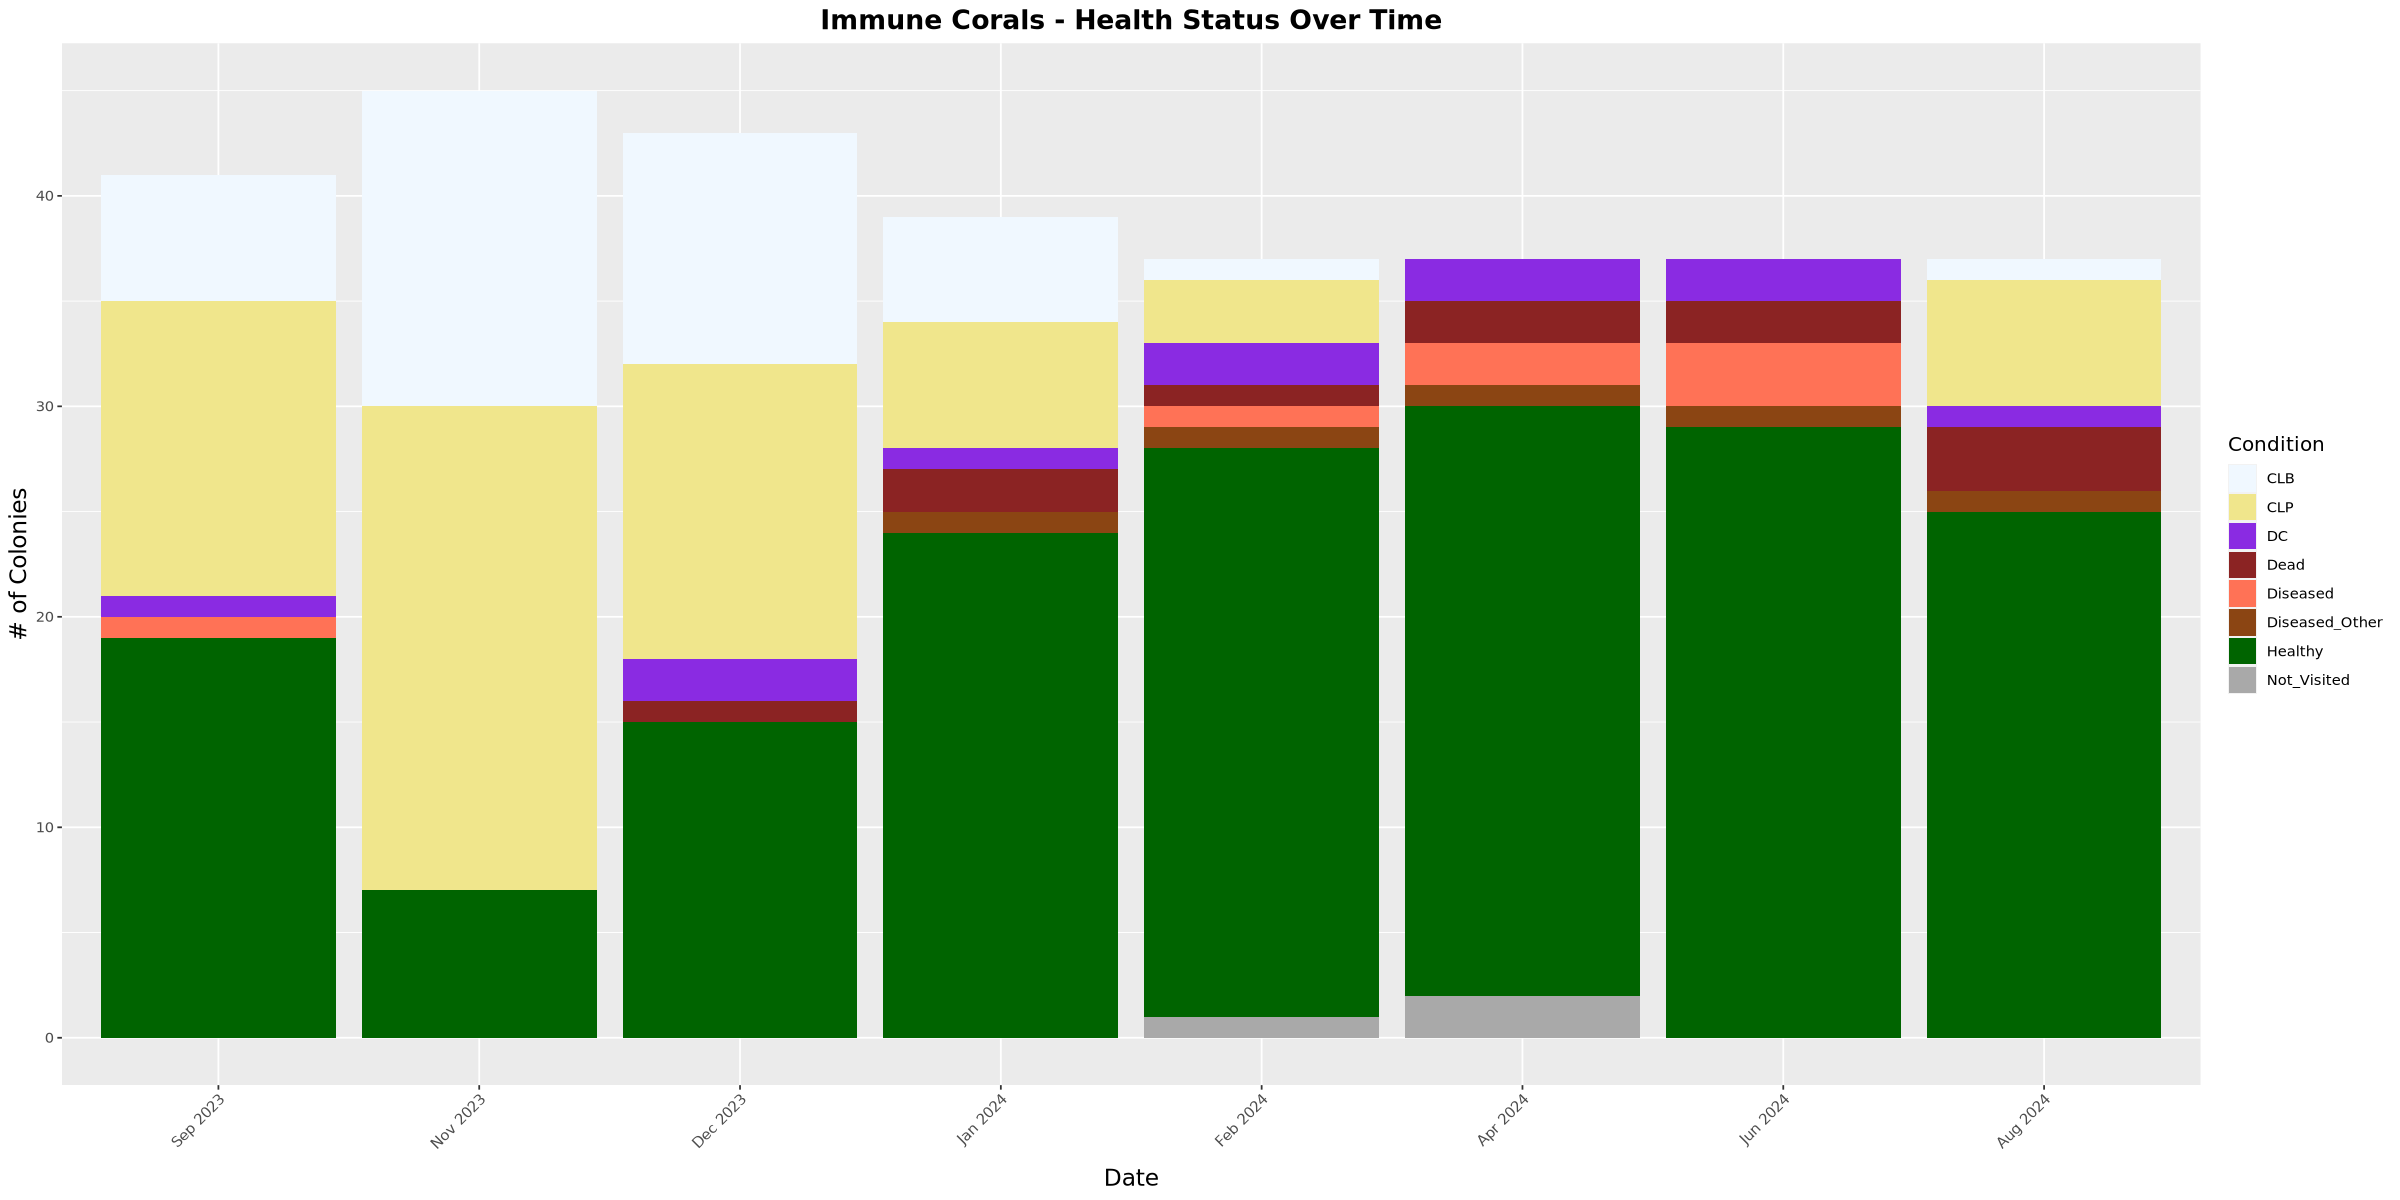

In [108]:
immune_plot<-ggplot(immune_ordered, aes(x = month_year, fill = condition)) +
  geom_bar(position = "stack", stat = "count") +  # Stacked bars
  scale_fill_manual(values = condition_colors,na.value = 'gainsboro') +  # Custom fill colors
  labs(x = "Date", y = "# of Colonies", title = "Immune Corals - Health Status Over Time", fill = "Condition") + # Custom legend title
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels
        axis.title = element_text(size = 14),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 10)),
        legend.title = element_text(size = 12),  # Legend title settings
        plot.title = element_text(size = 16, hjust = 0.5, face = "bold")) 
immune_plot

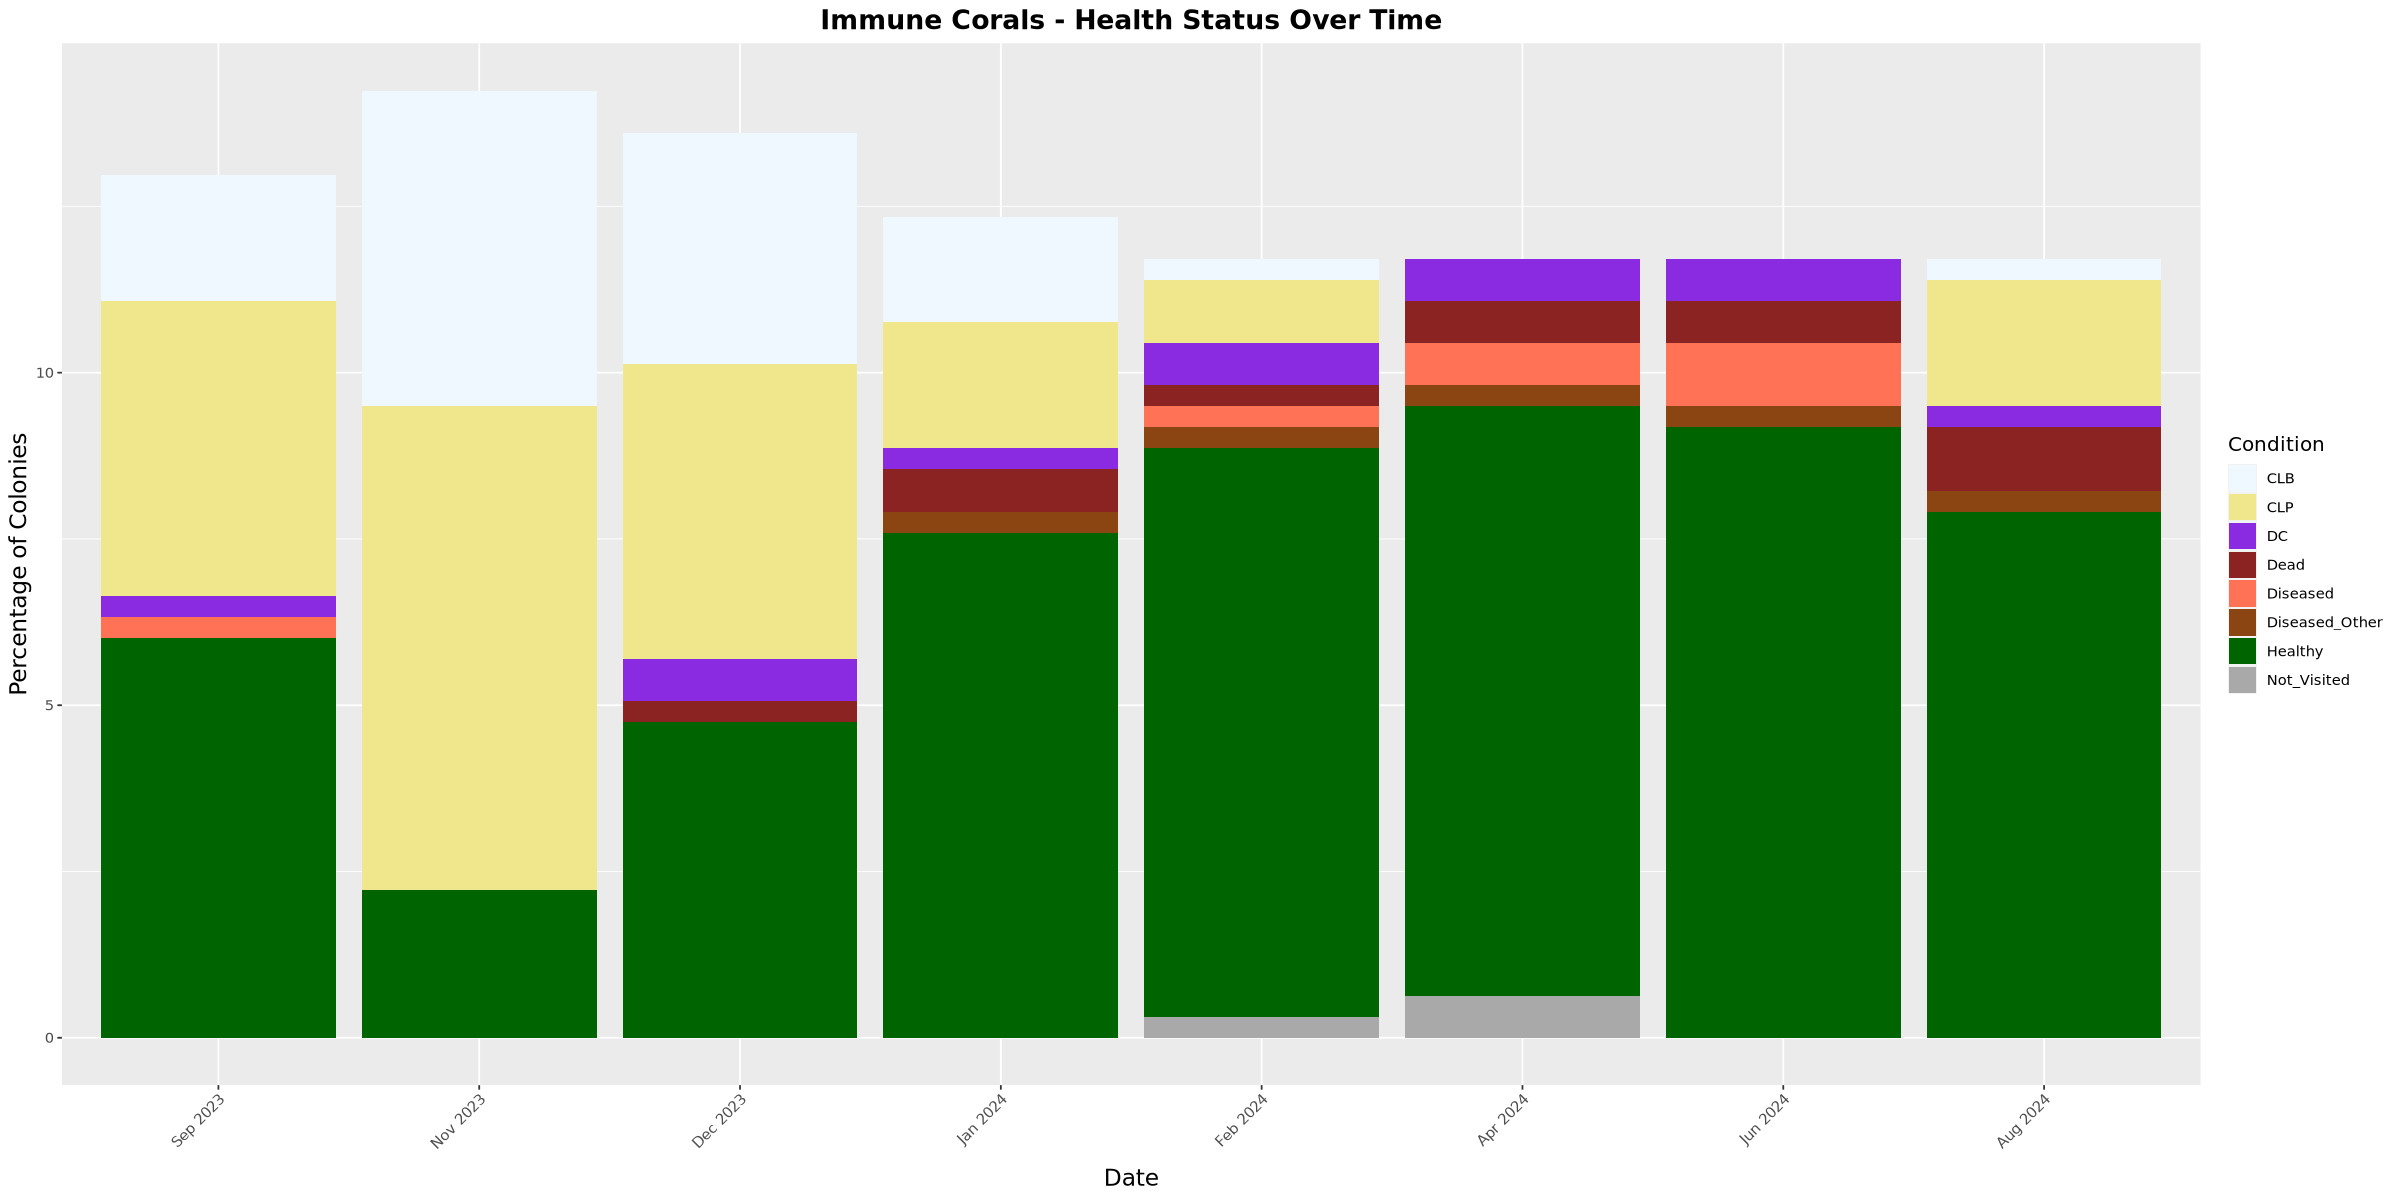

In [109]:
# Calculate proportions
immune_ordered_prop <- immune_ordered %>%
  group_by(month_year) %>%
  mutate(total = n()) %>%  # Total number of colonies for each month_year
  group_by(month_year, condition) %>%
  summarise(count = n(), .groups = 'drop') %>%  # Count each condition within each month_year
  mutate(prop = count / sum(count) * 100)  # Calculate percentage

# Plot with percentages
immune_plot <- ggplot(immune_ordered_prop, aes(x = month_year, y = prop, fill = condition)) +
  geom_bar(position = "stack", stat = "identity") +  # Use stat = "identity" for precomputed values
  scale_fill_manual(values = condition_colors, na.value = 'gainsboro') +  # Custom fill colors
  labs(x = "Date", y = "Percentage of Colonies", title = "Immune Corals - Health Status Over Time", fill = "Condition") + # Custom legend title
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels
        axis.title = element_text(size = 14),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 10)),
        legend.title = element_text(size = 12),  # Legend title settings
        plot.title = element_text(size = 16, hjust = 0.5, face = "bold")) 

# Display the plot
print(immune_plot)
